## Problem Statemeent

The financial insistute is looking forward to:

- Determine customers status in the bank with active accounts or not
- provide demographic, financial, and engagement data of bank customers.

## Approach/Solution
- Analyze Customer Demographics
- Understand Financial Performance
- Evaluate Engagement Metrics
- identify Exited vs Active Customers:
- Gain Insights for Predictive Analysis
- identify trends and patterns in customer engagement
- highlighting potential areas for business improvement
- 

## Objective
- Demographic Analysis
- Customer Engagement Patterns
- Financial Performance
- Exited Customers Analysis
- Customer Segmentation

In [1006]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as Sb

Cust_info = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name = 0)
Acct_info = pd. read_excel('Bank_Churn_Messy.xlsx', sheet_name = 1)

In [1007]:
Cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [1008]:
Acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [1009]:
comb_df = pd.merge(Cust_info, Acct_info, on=['CustomerId', 'Tenure'], how='left')

In [1010]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [1011]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0


## Data Exploration

In [1012]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


Observation Estimated_Salary is has incorrect datatype

In [1013]:
comb_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [1014]:
comb_df.shape

(10004, 13)

Result: Surname and age has incomplete rows

## Data Cleaning

In [1015]:
comb_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [1016]:
comb_df['Surname'].value_counts() 

Surname
Smith       32
Walker      31
Martin      29
Scott       29
Brown       26
            ..
Howey        1
Basedow      1
Thomsen      1
Riddle       1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [1017]:
comb_df[comb_df['Surname'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-€999999,€141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-€999999,€120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-€999999,€0.0,1,Yes,Yes,0


In [1018]:
#replace null values with unknown

comb_df['Surname'] = comb_df['Surname'].fillna('Unknown')

In [1019]:
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure,NumOfProducts,Exited
count,1.000400e+04,10004.000000,10001.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.919108,5.012195,1.529988,0.203719
std,7.193218e+04,96.665531,10.488725,2.891806,0.581635,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.000000


In [1020]:
#replace null values with the median
#calculates the median value of the Age column. 
#The median is the middle value in a sorted list of numbers and  If there are an even number of values, the median is the average of the two middle values.

comb_df['Age'] = comb_df['Age'].fillna(comb_df['Age'].median())

In [1021]:
comb_df['Balance'] = comb_df['Balance'].replace(['€999999', '€-999999', '€0.0'], 0)

In [1022]:
comb_df.duplicated().sum()

4

In [1023]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10004 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


## 1. Demographic Analysis:
Analyze the distribution of customers based on geography, gender, and age.
Identify any demographic segments (e.g., by geography or gender) that have a significantly different credit score, balance, or other financial metrics.


Obervation: EstimatedSalary and Balance has in correct data type

In [1024]:
comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].str.replace('€', ' ')

In [1025]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0,2,No,No,0


In [1026]:
#The regex=True argument ensures that the replace method works with regular expressions, 
#which is useful for pattern matching, but in this case it's not strictly necessary because we are replacing fixed strings ('€' and ',').

comb_df['Balance'] = comb_df['Balance'].astype(str).replace({'€': '', ',': ''}, regex=True)

In [1027]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0,2,No,No,0


In [1028]:
comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].replace(['999999', '-999999', '0.0'], 0)


In [1029]:
# Convert to numeric, invalid values will be NaN

comb_df['EstimatedSalary'] = pd.to_numeric(comb_df['EstimatedSalary'], errors='coerce')  
comb_df['Balance'] = pd.to_numeric(comb_df['Balance'], errors='coerce')

In [1030]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0


In [1031]:
comb_df['Geography'].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1658
FRA        1619
Name: count, dtype: int64

In [1032]:
comb_df['Geography'] = comb_df['Geography'].replace('FRA', 'France')

In [1033]:
comb_df['Geography'].value_counts()

Geography
France     3360
Germany    2509
Spain      2477
French     1658
Name: count, dtype: int64

In [1034]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0


In [1035]:
cat_columns = [col for col in comb_df.select_dtypes(include='object').columns]

In [1036]:
cat_columns

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [1037]:
comb_df['HasCrCard'] = comb_df['HasCrCard'].replace('HasCrCard', 'HasCreditCard')

In [1038]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0


In [1039]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0
10003,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,No,0


In [1040]:
comb_df['Age'] = comb_df['Age'].astype(int)

In [1041]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,1
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,No,0


In [1042]:
comb_df['Gender'].value_counts()

Gender
Male      5457
Female    4547
Name: count, dtype: int64

In [1043]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10004 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  int32  
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10001 non-null  float64
 8   Balance          10004 non-null  float64
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 977.1+ KB


In [1044]:
comb_df['Geography'].value_counts()

Geography
France     3360
Germany    2509
Spain      2477
French     1658
Name: count, dtype: int64

## Data Mapping

In [1045]:
comb_df['IsActiveMember'] = comb_df['IsActiveMember'].map({'Yes': 1, 'No': 0})

In [1046]:
comb_df['HasCrCard'] = comb_df['HasCrCard'].map({'Yes': 1, 'No': 0})

In [1047]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,0,0,0


## Data Analysis

In [1048]:
def generate_bar_plot(x,y, xlabel, ylabel):
    plt.bar(x,y)
    plt.title (f'plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show

In [1049]:
comb_df['Geography'].value_counts()

Geography
France     3360
Germany    2509
Spain      2477
French     1658
Name: count, dtype: int64

In [1050]:
geo_analysis = comb_df.groupby('Geography')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().reset_index()

In [1051]:
geo_analysis

,Geography,CreditScore,Balance,EstimatedSalary
0,France,650.549702,62650.979241,100444.100557
1,French,648.121230,61046.813999,98696.350730
2,Germany,651.453567,119730.116134,101113.804322
3,Spain,651.333872,61818.147763,99440.293453


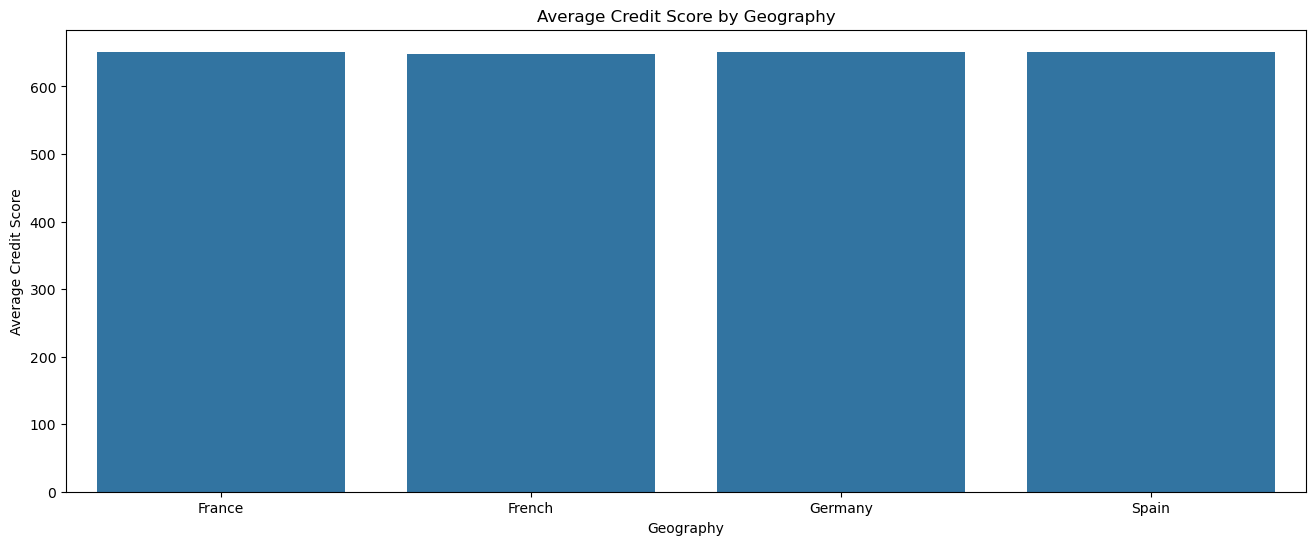

In [1052]:
plt.figure(figsize=(16, 6))
Sb.barplot(x='Geography', y='CreditScore', data=geo_analysis)
plt.title('Average Credit Score by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Credit Score')
plt.show()

In [1053]:
comb_df[['Gender']].value_counts()

Gender
Male      5457
Female    4547
Name: count, dtype: int64

In [1054]:
gender_analysis = comb_df.groupby('Gender')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().reset_index()

In [1055]:
gender_analysis

,Gender,CreditScore,Balance,EstimatedSalary
0,Female,650.917528,75678.676571,100565.105776
1,Male,650.276892,77173.974506,99664.491452


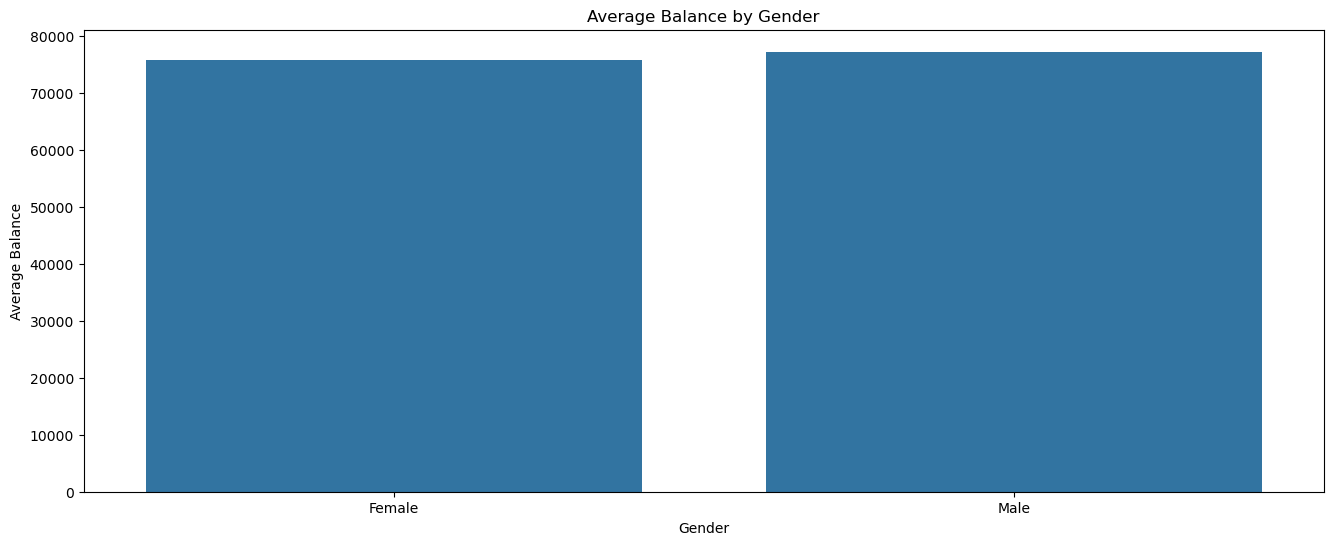

In [1056]:
plt.figure(figsize=(16, 6))
Sb.barplot(x='Gender', y='Balance', data=gender_analysis)
plt.title('Average Balance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Balance')
plt.show()

In [1057]:
comb_df['Age'].value_counts().sort_index()

Age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: count, Length: 70, dtype: int64

In [1058]:
age_analysis = comb_df.groupby('Age')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().reset_index()

In [1059]:
age_analysis

,Age,CreditScore,Balance,EstimatedSalary
0,18,686.681818,79169.57500,85102.389545
1,19,665.629630,70502.53963,97734.100370
2,20,665.050000,76038.89000,97705.542000
3,21,647.283019,75926.88283,102536.673774
4,22,636.547619,68213.74881,98321.615476
...,...,...,...,...
65,83,678.000000,123356.63000,92934.410000
66,84,472.500000,90057.86500,187360.250000
67,85,787.000000,0.00000,116537.960000
68,88,513.000000,0.00000,52952.240000


In [1060]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Create the 'AgeGroup' column again with these new ranges
comb_df['AgeGroup'] = pd.cut(comb_df['Age'], bins=age_bins, labels=age_labels, right=False)

In [1061]:
age_analysis['AgeGroup'] = pd.cut(age_analysis['Age'], bins=age_bins, labels=age_labels, right=False)

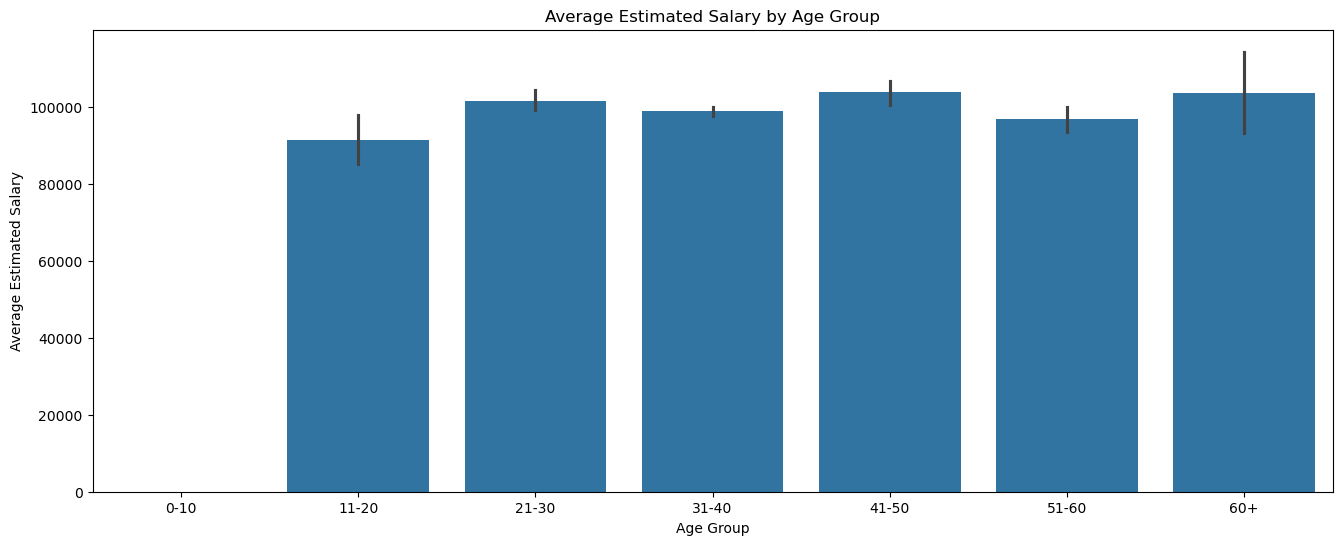

In [1062]:
plt.figure(figsize=(16, 6))

# Create the barplot: x='AgeGroup', y='EstimatedSalary'
Sb.barplot(x='AgeGroup', y='EstimatedSalary', data=age_analysis)

# Adding title and labels
plt.title('Average Estimated Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Estimated Salary')

# Display the plot
plt.show()

## 2. Customer Engagement Patterns

Investigate the relationship between customer tenure and engagement (such as the number of products owned, HasCrCard, and IsActiveMember).

Analyze the impact of tenure on customer behavior, especially focusing on long-term customer patterns 

(e.g., do longer-tenured customers tend to hold more products or have higher balances?).

In [1063]:
comb_df['Tenure'].value_counts()

Tenure
2     1049
1     1035
7     1028
8     1025
5     1012
3     1009
4      992
9      984
6      967
10     490
0      413
Name: count, dtype: int64

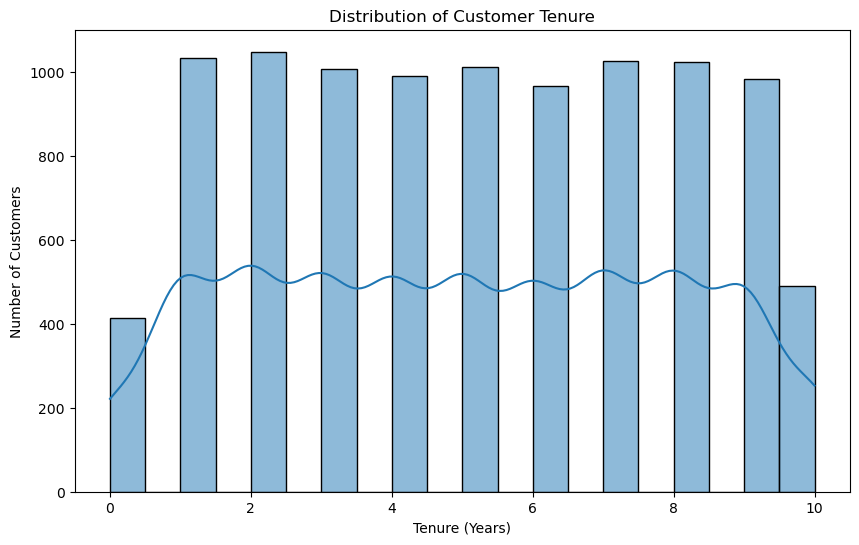

In [1064]:
plt.figure(figsize=(10, 6))
Sb.histplot(comb_df['Tenure'], kde=True, bins=20) #Kernel Density Estimate (KDE) plot on top of the histogram.
#The bins parameter controls how many bars (or "bins") are used to divide the range of data into intervals. Each bin represents a range of values in the dataset.
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.show()

In [1065]:
tenure_product_analysis = comb_df.groupby('Tenure')['NumOfProducts'].mean().reset_index()

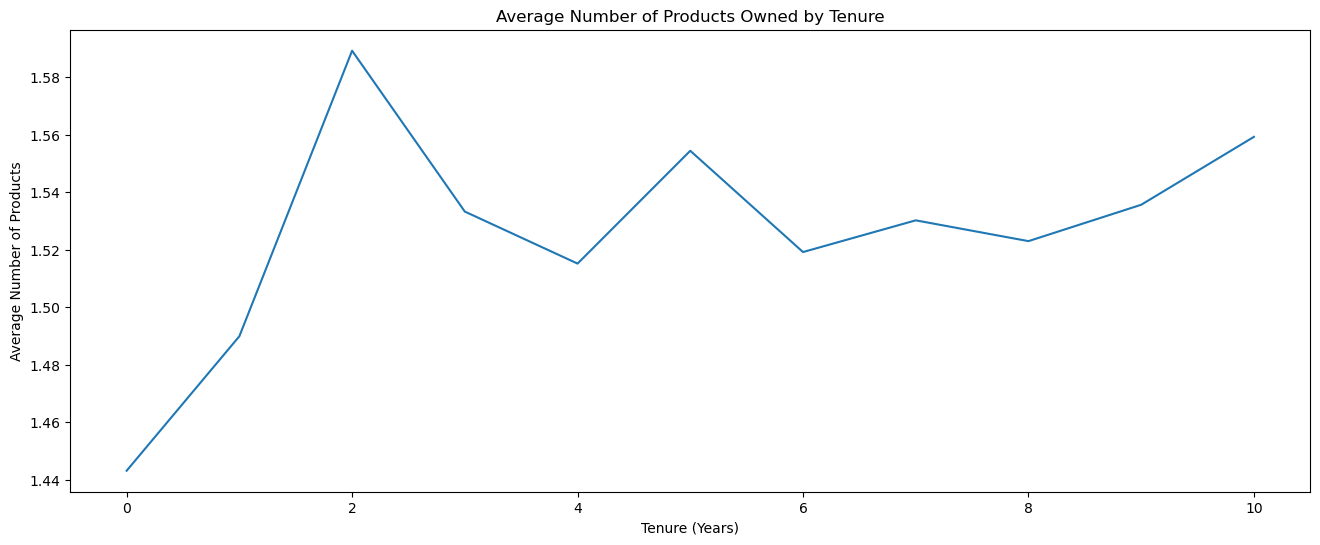

In [1066]:
plt.figure(figsize=(16, 6))
Sb.lineplot(x='Tenure', y='NumOfProducts', data=tenure_product_analysis)
plt.title('Average Number of Products Owned by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Number of Products')
plt.show()

In [1067]:
credit_card_analysis = comb_df.groupby('Tenure')['HasCrCard'].mean().reset_index()

In [1068]:
comb_df.groupby('Tenure')['HasCrCard'].sum()

Tenure
0     219
1     569
2     561
3     524
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: HasCrCard, dtype: int64

In [1069]:
comb_df.groupby('Tenure')['IsActiveMember'].sum()

Tenure
0     219
1     569
2     561
3     524
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: IsActiveMember, dtype: int64

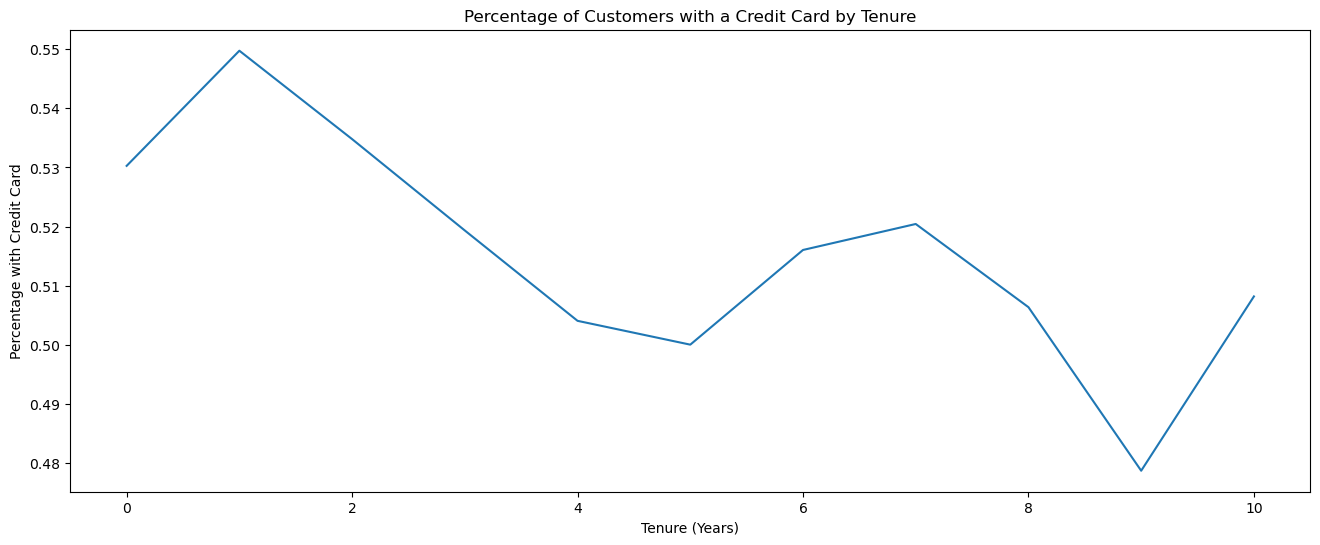

In [1070]:
plt.figure(figsize=(16, 6))
Sb.lineplot(x='Tenure', y='HasCrCard', data=credit_card_analysis)
plt.title('Percentage of Customers with a Credit Card by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Percentage with Credit Card')
plt.show()

In [1071]:
active_member_analysis['Tenure'] = active_member_analysis['Tenure'].astype(int)

In [1072]:
comb_df.groupby('Tenure')['IsActiveMember'].sum()

Tenure
0     219
1     569
2     561
3     524
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: IsActiveMember, dtype: int64

In [1073]:
active_member_analysis = comb_df.groupby('Tenure')['IsActiveMember'].mean().reset_index()

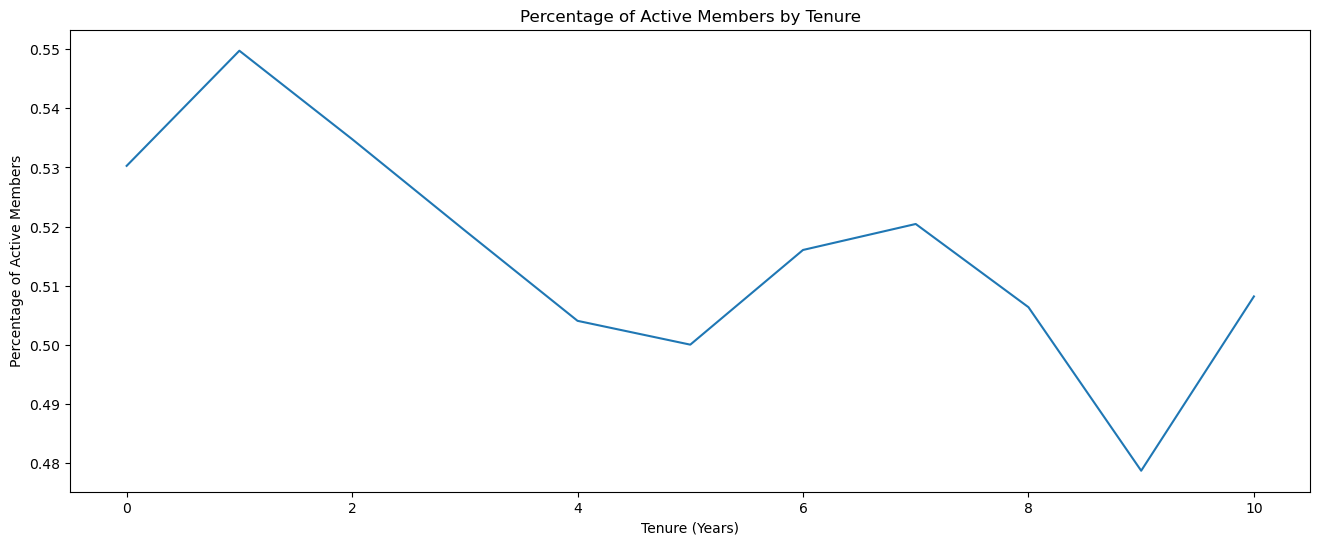

In [1074]:
plt.figure(figsize=(16, 6))
Sb.lineplot(x='Tenure', y='IsActiveMember', data=active_member_analysis)
plt.title('Percentage of Active Members by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Percentage of Active Members')
plt.show()

## Financial Performance:
Explore credit score distribution and identify which customer segments (e.g., age, gender, geography) tend to have higher or lower credit scores.
Analyze customer balance and estimated salary patterns and compare them across different demographic groups.


In [1075]:
comb_df.groupby('Tenure')['CreditScore'].sum()

Tenure
0     269294
1     671515
2     684787
3     656385
4     646712
5     658334
6     626017
7     667795
8     663943
9     643180
10    320321
Name: CreditScore, dtype: int64

In [1076]:
comb_df['CreditScore'] = comb_df['CreditScore'].round()

In [1077]:
Tenure_credit_score_analysis = comb_df.groupby('Tenure')['CreditScore'].mean().reset_index()

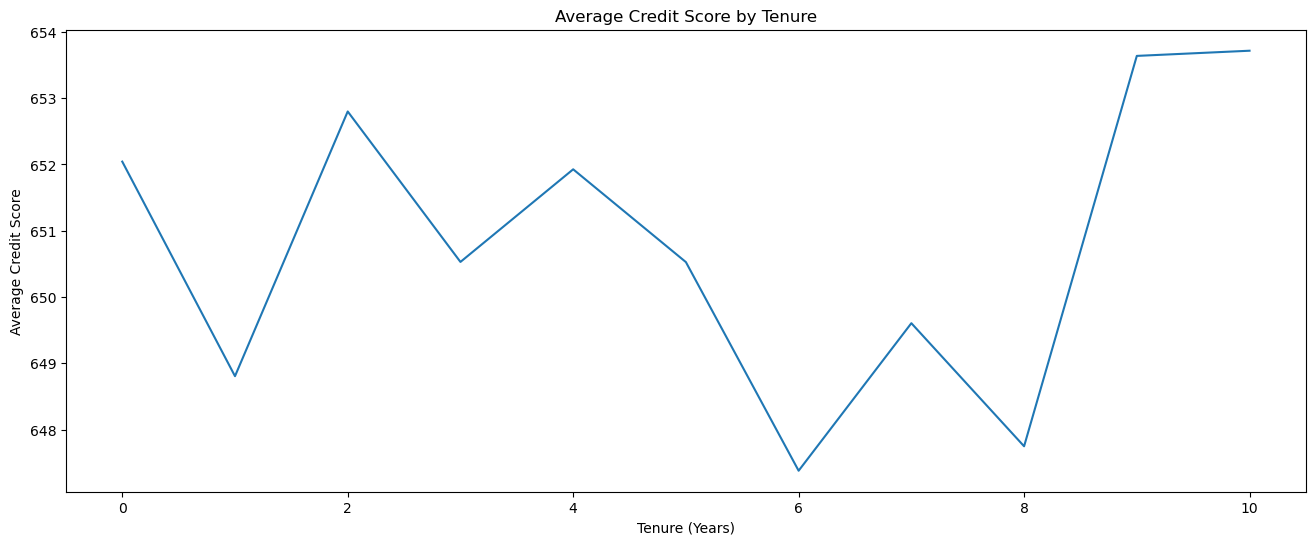

In [1078]:
plt.figure(figsize=(16, 6))
Sb.lineplot(x='Tenure', y='CreditScore', data=Tenure_credit_score_analysis)
plt.title('Average Credit Score by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Credit Score')
plt.show()

In [1079]:
comb_df.groupby('Tenure')['Balance'].sum()

Tenure
0     32989990.09
1     81304822.67
2     80527928.54
3     78367072.42
4     73635169.10
5     77361612.23
6     71948612.53
7     77667080.19
8     79885013.21
9     75337543.31
10    36224476.96
Name: Balance, dtype: float64

In [1080]:
comb_df['Balance'] = comb_df['Balance'].round()

In [1081]:
Tenure_balance_analysis = comb_df.groupby('Tenure')['Balance'].mean().reset_index()

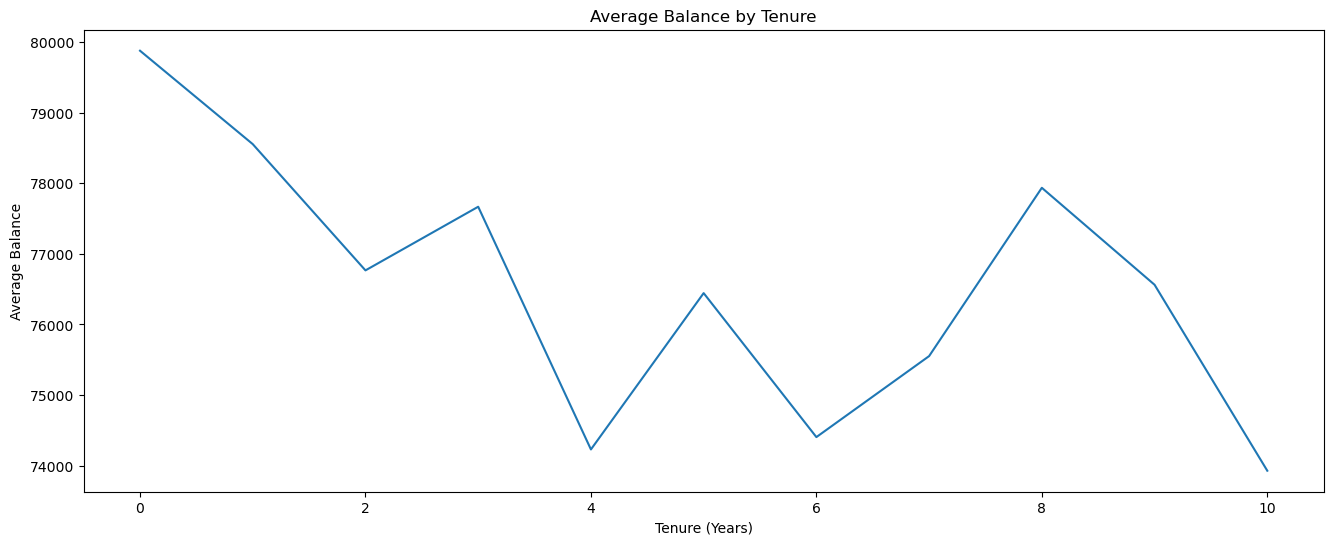

In [1082]:
plt.figure(figsize=(16, 6))
Sb.lineplot(x='Tenure', y='Balance', data=Tenure_balance_analysis)
plt.title('Average Balance by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Balance')
plt.show()

In [1083]:
def categorize_customer(tenure):
    if tenure < 3:
        return 'Short Term'
    else:
        return 'Long Term'

comb_df['CustomerType'] = comb_df['Tenure'].apply(categorize_customer)

In [1084]:
comb_df[['Tenure', 'CustomerType']].head()

,Tenure,CustomerType
0,2,Short Term
1,2,Short Term
2,1,Short Term
3,8,Long Term
4,1,Short Term


In [1085]:
Tenure_summary = comb_df.groupby('Tenure')[['CreditScore', 'Balance', 'NumOfProducts']].mean()

In [1086]:
short_term_customers = comb_df[comb_df['Tenure'] < 3]

In [1087]:
short_term_customers[['CreditScore', 'Balance', 'NumOfProducts']].count()

CreditScore      2497
Balance          2497
NumOfProducts    2497
dtype: int64

In [1088]:
long_term_customers = comb_df[comb_df['Tenure'] > 3]

In [1089]:
long_term_customers[['CreditScore', 'Balance', 'NumOfProducts']].count()

CreditScore      6498
Balance          6498
NumOfProducts    6498
dtype: int64

In [1090]:
tenure_counts = short_term_customers['Tenure'].value_counts().sort_index()

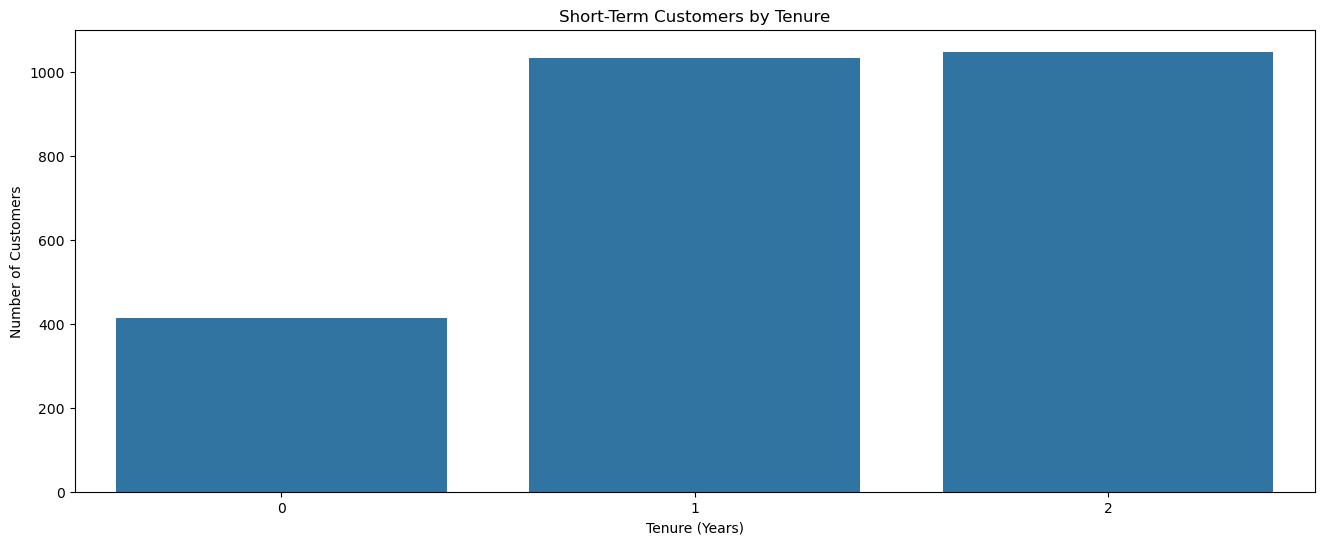

In [1091]:
plt.figure(figsize=(16, 6))
Sb.barplot(x=tenure_counts.index, y=tenure_counts.values)  # 'x' = Tenure, 'y' = count of customers
plt.title('Short-Term Customers by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.show()

In [1092]:
long_term_customers = comb_df[comb_df['Tenure'] >= 3]

In [1093]:
tenure_range_counts = long_term_customers['Tenure'].value_counts().sort_index()

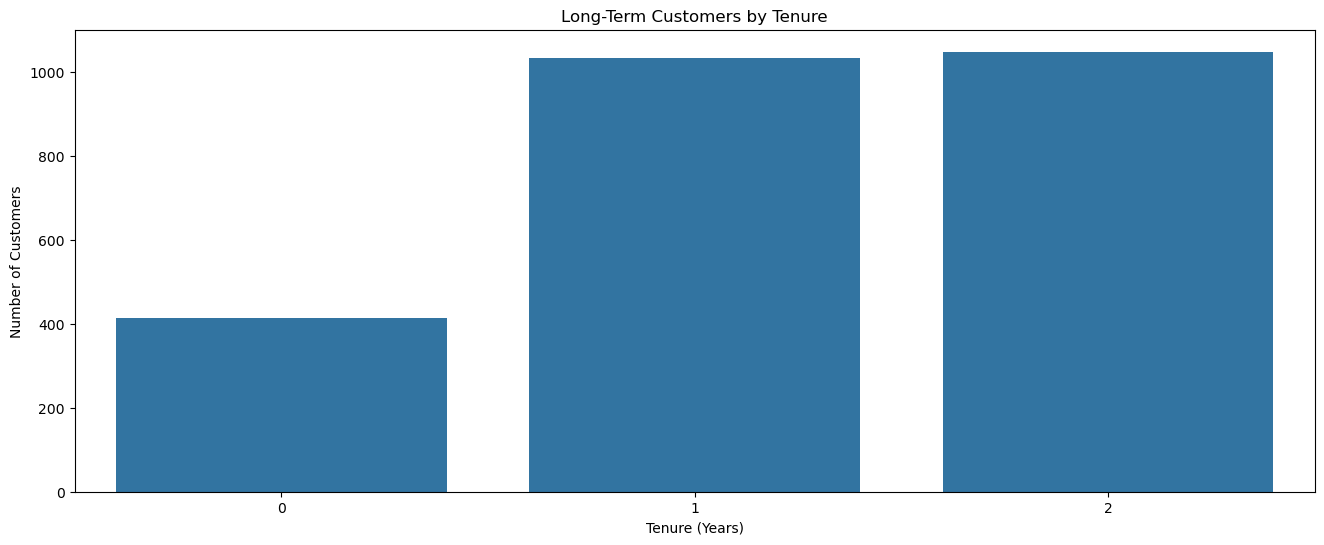

In [1094]:
plt.figure(figsize=(16, 6))
Sb.barplot(x=tenure_counts.index, y=tenure_counts.values)  # 'x' = Tenure, 'y' = count of customers
plt.title('Long-Term Customers by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.show()

## Exited Customers Analysis:
Compare the financial and demographic characteristics of customers who exited the bank versus those who remain active.
Identify possible factors (e.g., age, credit score, balance) associated with customers exiting the bank.


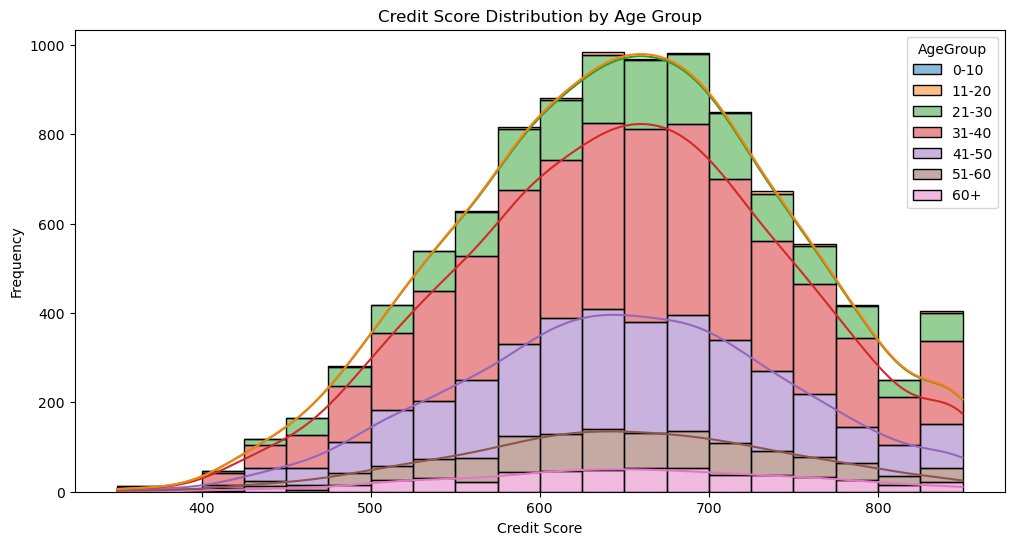

In [1095]:
plt.figure(figsize=(12, 6))
Sb.histplot(data=comb_df, x='CreditScore', hue='AgeGroup', multiple='stack', bins=20, kde=True)

# Add title and labels
plt.title('Credit Score Distribution by Age Group')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [1096]:
comb_df[['Gender', 'CreditScore']].isnull().sum()

Gender         0
CreditScore    0
dtype: int64

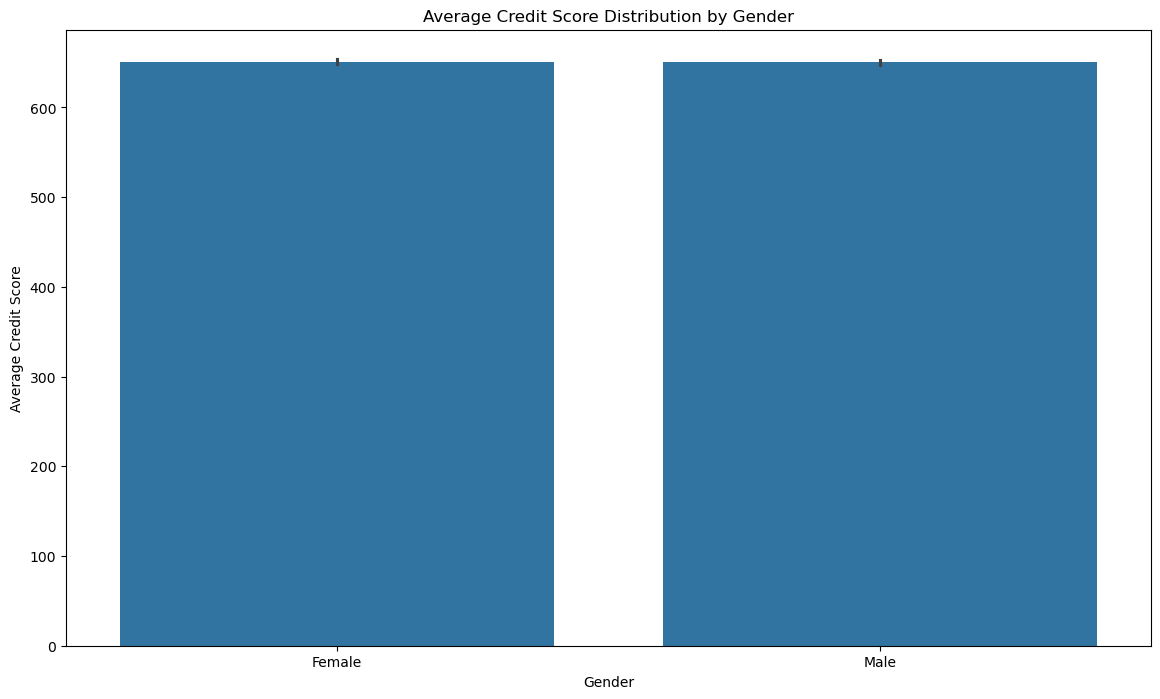

In [1097]:
plt.figure(figsize=(14, 8))

Sb.barplot(x='Gender', y='CreditScore', data=comb_df)
plt.title('Average Credit Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Credit Score')
plt.show()

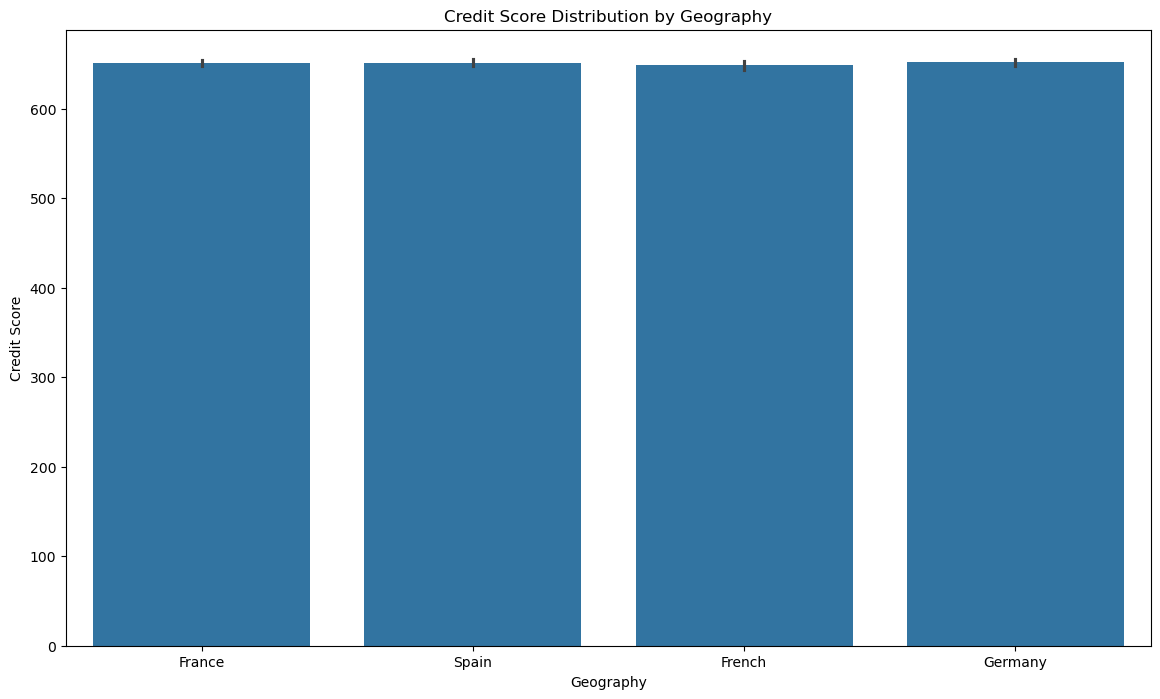

In [1098]:

plt.figure(figsize=(14, 8))
Sb.barplot(x='Geography', y='CreditScore', data=comb_df)
plt.title('Credit Score Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Credit Score')
plt.show()

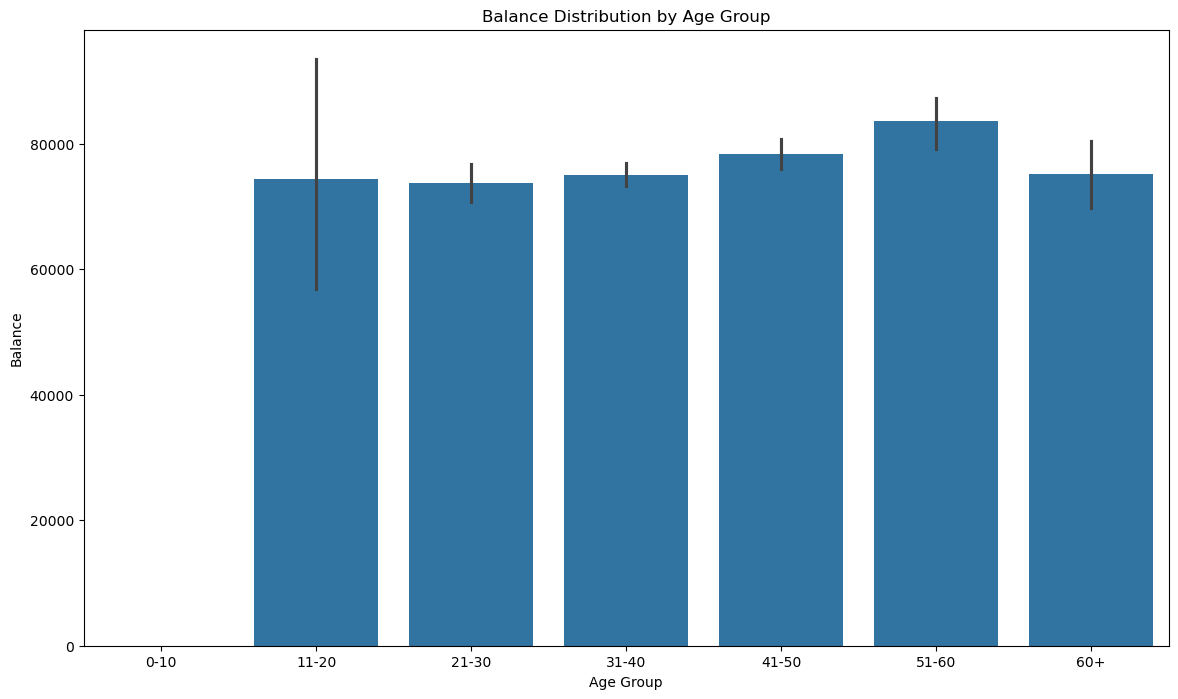

In [1099]:
# Balance distribution by Age group
plt.figure(figsize=(14, 8))
Sb.barplot(x='AgeGroup', y='Balance', data=comb_df)
plt.title('Balance Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Balance')
plt.show()

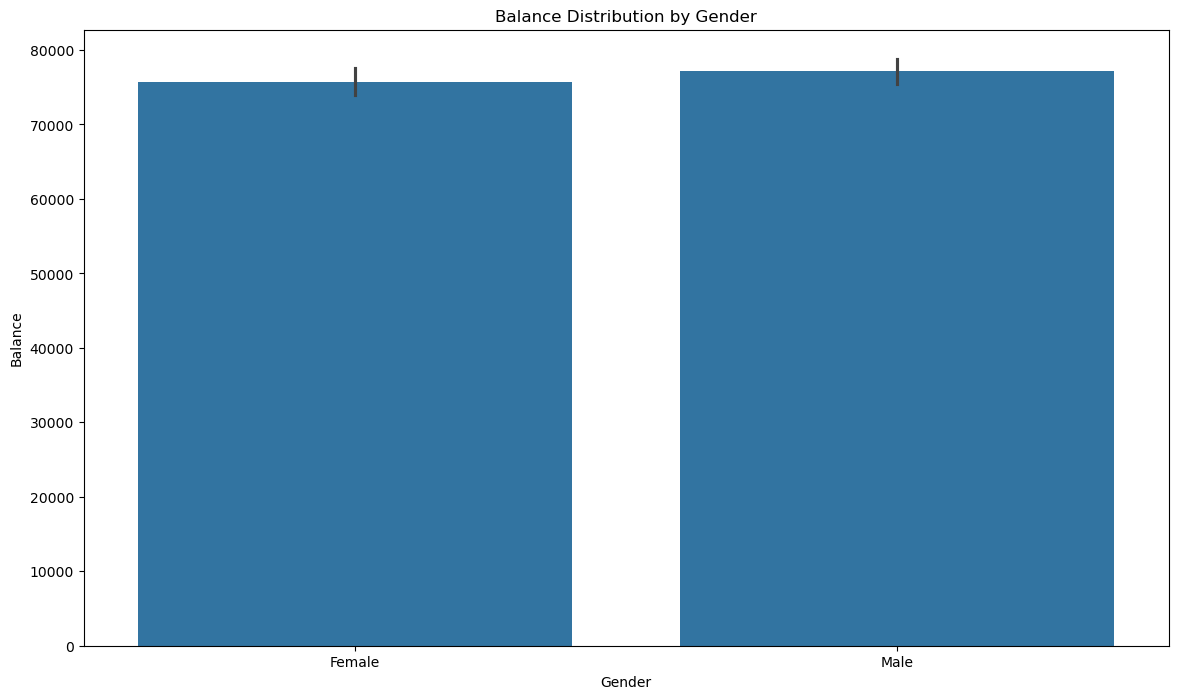

In [1100]:
plt.figure(figsize=(14, 8))
Sb.barplot(x='Gender', y='Balance', data=comb_df)
plt.title('Balance Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.show()

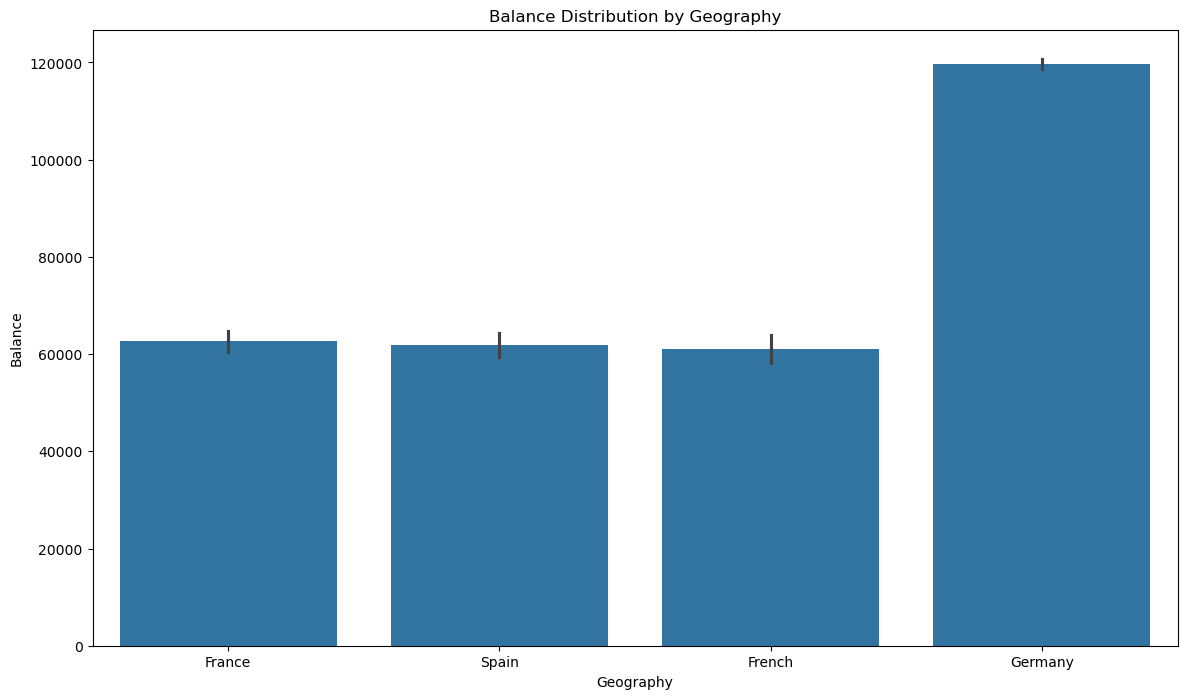

In [1101]:
# Balance distribution by Geography
plt.figure(figsize=(14, 8))
Sb.barplot(x='Geography', y='Balance', data=comb_df)
plt.title('Balance Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.show()

In [1102]:
comb_df.groupby('Gender')['EstimatedSalary'].sum()

Gender
Female    4.570684e+08
Male      5.437695e+08
Name: EstimatedSalary, dtype: float64

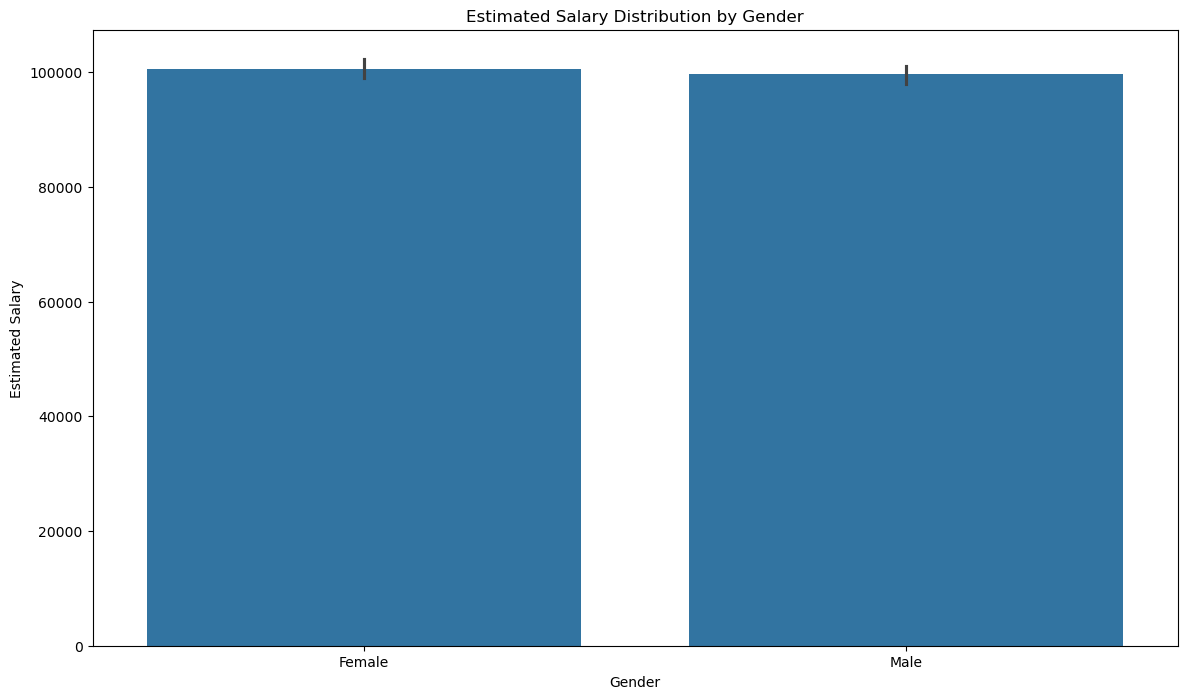

In [1103]:
# Estimated Salary distribution by Gender
plt.figure(figsize=(14, 8))
Sb.barplot(x='Gender', y='EstimatedSalary', data=comb_df)
plt.title('Estimated Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

In [1104]:
comb_df.groupby('Geography')['EstimatedSalary'].sum()

Geography
France     3.373917e+08
French     1.636385e+08
Germany    2.535934e+08
Spain      2.462142e+08
Name: EstimatedSalary, dtype: float64

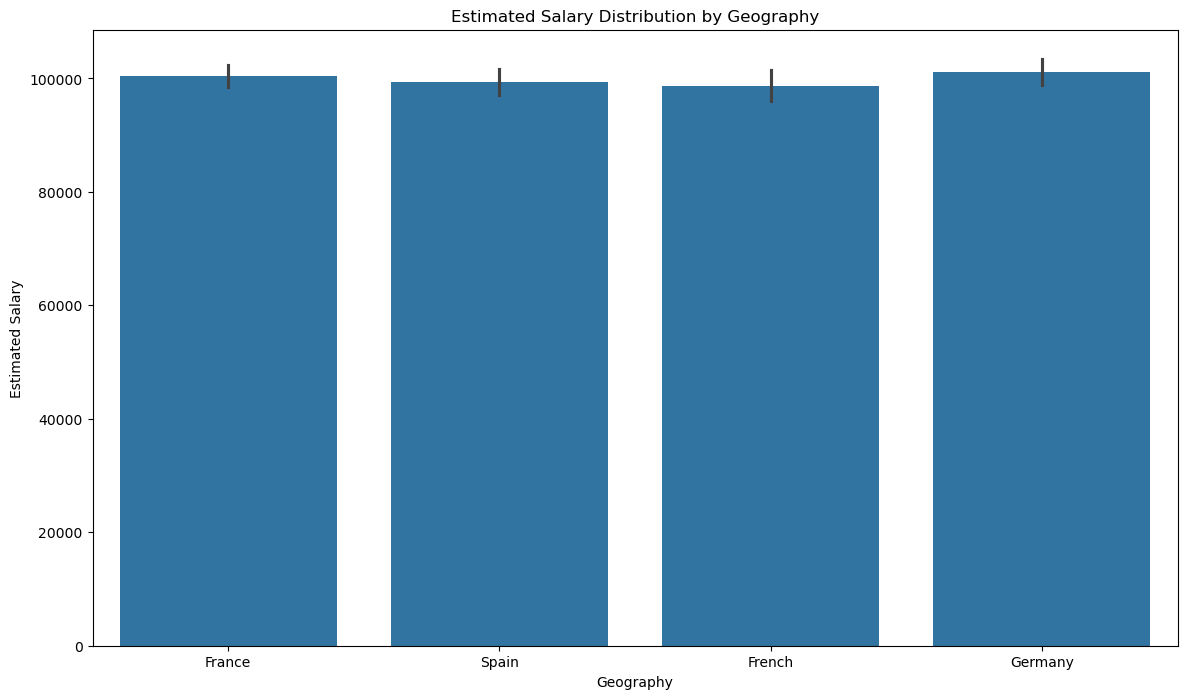

In [1105]:
# Estimated Salary distribution by Geography
plt.figure(figsize=(14, 8))
Sb.barplot(x='Geography', y='EstimatedSalary', data=comb_df)
plt.title('Estimated Salary Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Estimated Salary')
plt.show()

In [1106]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,AgeGroup,CustomerType
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.0,1,1,1,1,41-50,Short Term
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.0,1,1,1,1,41-50,Short Term
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83808.0,1,1,1,0,41-50,Short Term
3,15619304,Onio,502,French,Female,42,8,113931.57,159661.0,3,0,0,1,41-50,Long Term
4,15701354,Boni,699,France,Female,39,1,93826.63,0.0,2,0,0,0,31-40,Short Term


## Customer Segmentation:
Based on the available data, identify distinct customer segments (e.g., high-balance vs. low-balance customers) and analyze their unique characteristics.
Provide insights into how the bank could optimize its services for each segment, such as offering tailored products to certain demographics or improving engagement with less active members.


In [1107]:
def credit_score_category(score):
    if score >= 700:
        return 'High'
    elif score >= 600:
        return 'Medium'
    else:
        return 'Low'

comb_df['CreditScoreCategory'] = comb_df['CreditScore'].apply(credit_score_category)

In [1108]:
comb_df['CreditScoreCategory'].value_counts()

CreditScoreCategory
Medium    3819
High      3151
Low       3034
Name: count, dtype: int64

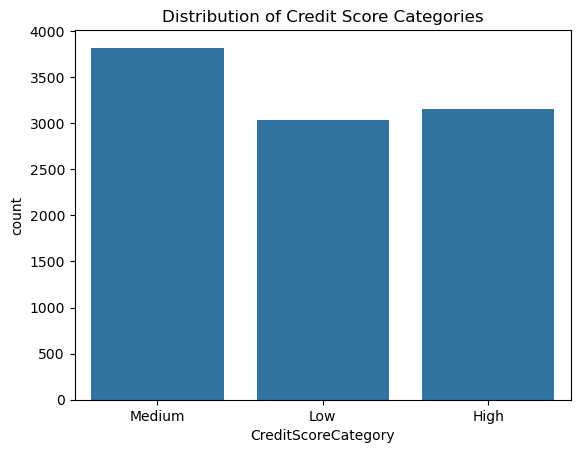

In [1109]:
Sb.countplot(data=comb_df, x='CreditScoreCategory')
plt.title('Distribution of Credit Score Categories')
plt.show()

In [1110]:
comb_df['Balance'] = pd.to_numeric(comb_df['Balance'], errors='coerce')

In [1111]:
median_balance = comb_df['Balance'].median()

In [1112]:
def balance_category(balance):
    if balance >= median_balance:
        return 'High Balance'
    else:
        return 'Low Balance'

comb_df['BalanceCategory'] = comb_df['Balance'].apply(balance_category)

In [1113]:
comb_df['Balance'].describe()

count     10004.000000
mean      76494.338265
std       62396.538176
min           0.000000
25%           0.000000
50%       97221.500000
75%      127656.250000
max      250898.000000
Name: Balance, dtype: float64

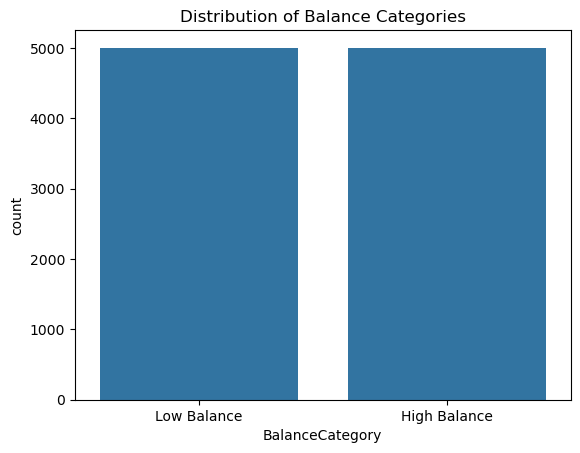

In [1114]:
Sb.countplot(data=comb_df, x='BalanceCategory')
plt.title('Distribution of Balance Categories')
plt.show()

In [1115]:
def age_group(age):
    if age < 31:
        return 'Young Adult (18-30)'
    elif 31 <= age <= 50:
        return 'Mid-Life Adult (31-50)'
    else:
        return 'Older Adult (51+)'

comb_df['AgeGroup'] = comb_df['Age'].apply(age_group)

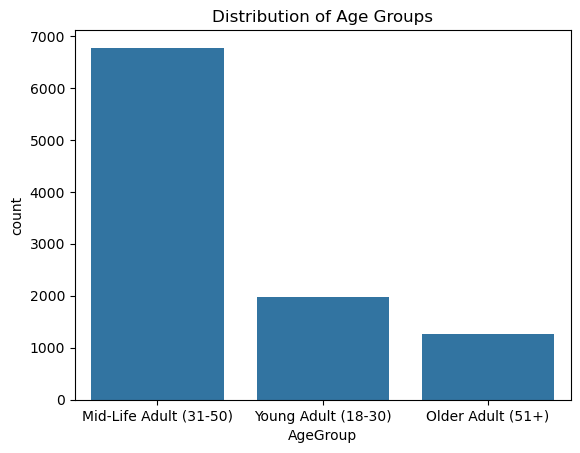

In [1117]:
Sb.countplot(data=comb_df, x='AgeGroup')
plt.title('Distribution of Age Groups')
plt.show()

In [1118]:
comb_df['IsActiveMember'].value_counts()

IsActiveMember
1    5152
0    4852
Name: count, dtype: int64

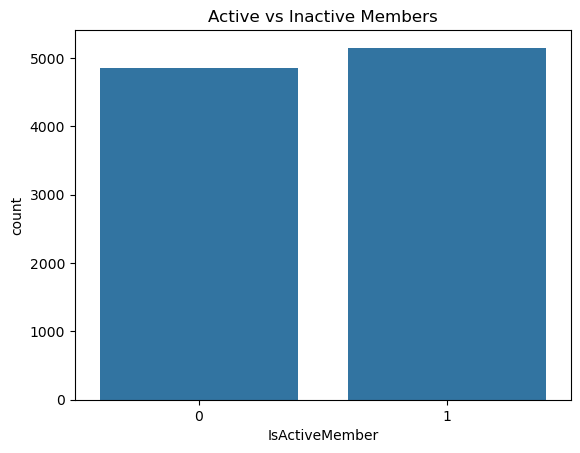

In [1120]:
Sb.countplot(data=comb_df, x='IsActiveMember')
plt.title('Active vs Inactive Members')
plt.show()

In [1125]:
def customer_type(tenure):
    if tenure <= 3:
        return 'Short Term'
    else:
        return 'Long Term'

comb_df['CustomerType'] = comb_df['Tenure'].apply(customer_type)

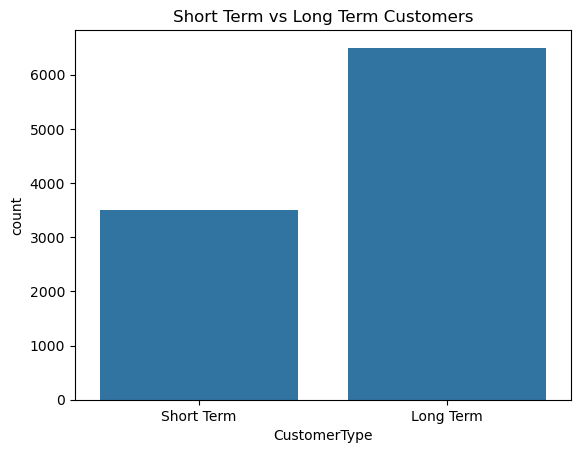

In [1126]:
Sb.countplot(data=comb_df, x='CustomerType')
plt.title('Short Term vs Long Term Customers')
plt.show()

In [1128]:
comb_df['CustomerSegment'] = comb_df['CreditScoreCategory'] + ' | ' + comb_df['BalanceCategory'] + ' | ' +comb_df['AgeGroup'] + ' | ' + comb_df['CustomerType']

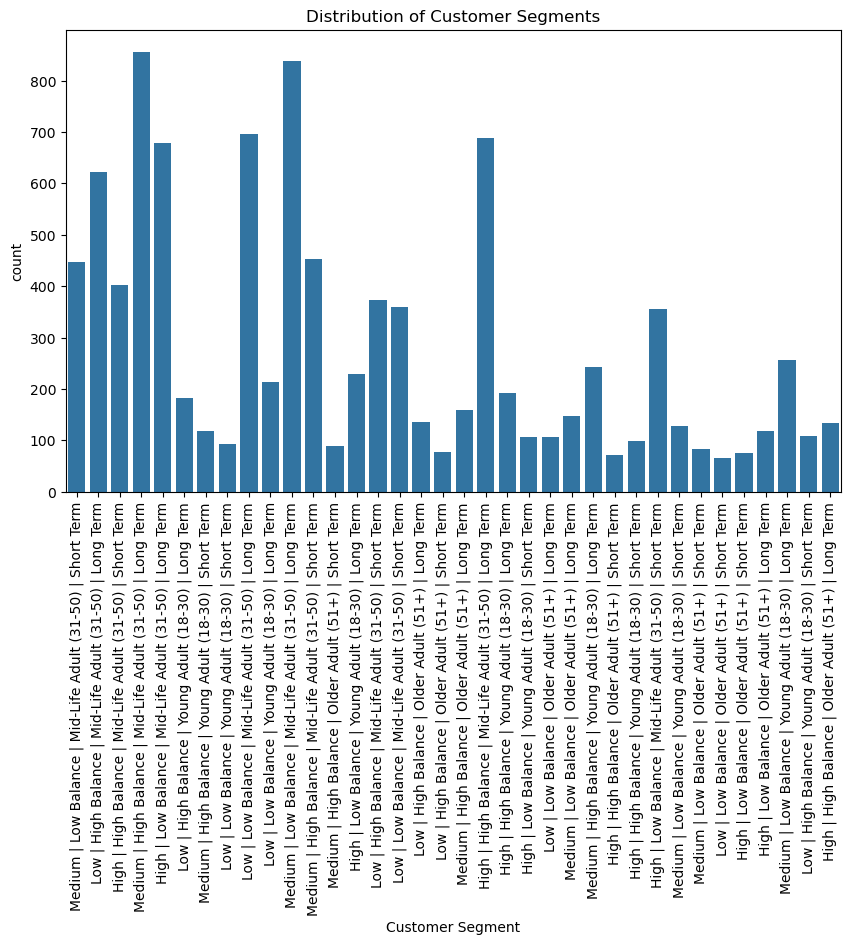

In [1135]:
plt.figure(figsize=(10, 6))
Sb.countplot(data=comb_df, x='CustomerSegment')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.xticks(rotation=90)
plt.show()

In [1139]:
churn_by_segment = comb_df.groupby('CustomerSegment')['Exited'].mean()

In [1141]:
churn_by_segment

CustomerSegment
High | High Balance | Mid-Life Adult (31-50) | Long Term       0.251453
High | High Balance | Mid-Life Adult (31-50) | Short Term      0.206468
High | High Balance | Older Adult (51+) | Long Term            0.503759
High | High Balance | Older Adult (51+) | Short Term           0.549296
High | High Balance | Young Adult (18-30) | Long Term          0.140625
High | High Balance | Young Adult (18-30) | Short Term         0.070707
High | Low Balance | Mid-Life Adult (31-50) | Long Term        0.128130
High | Low Balance | Mid-Life Adult (31-50) | Short Term       0.151685
High | Low Balance | Older Adult (51+) | Long Term             0.378151
High | Low Balance | Older Adult (51+) | Short Term            0.386667
High | Low Balance | Young Adult (18-30) | Long Term           0.030435
High | Low Balance | Young Adult (18-30) | Short Term          0.056075
Low | High Balance | Mid-Life Adult (31-50) | Long Term        0.242376
Low | High Balance | Mid-Life Adult (31-50) | Sh

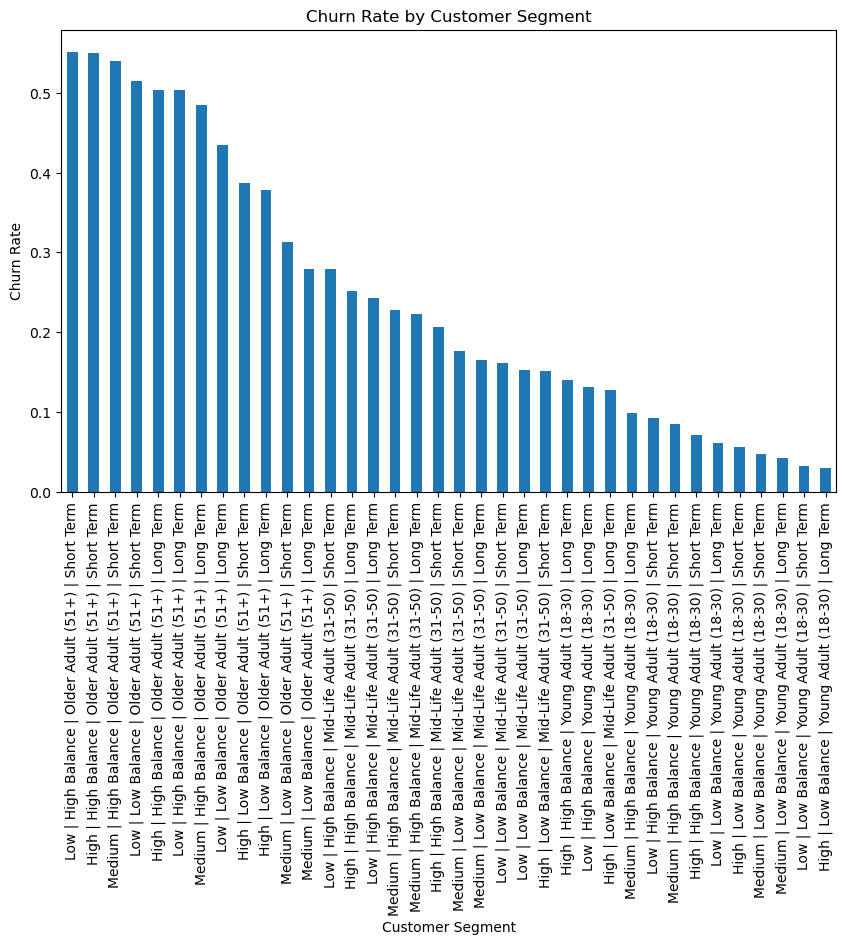

In [1142]:
plt.figure(figsize=(10, 6))
churn_by_segment.sort_values(ascending=False).plot(kind='bar')
plt.title('Churn Rate by Customer Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Customer Segment')
plt.show()

In [1143]:
comb_df.to_csv('Cleaned BankChurn Dataset.csv')